# Beispiel: Logarithmisches Dekrement 

## Aufgabenstellung

Das in @fig-ems_rahmen_1 dargestellte System zeigt ein Rahmentragwerk. Dieses wird anhand eines Einmassenschwingers approximiert.

![Am Riegel ausgelenktes System](bilder/ems_rahmen_1.png){#fig-ems_rahmen_1 width=60%}

Gesucht:

- Laterale bzw. horizontale Steifigkeit $k$ des Rahmens
- Die Dämpfungsrate $\zeta$ und die Dämpfungskonstante $c$
- Die Amplitude der Auslenkung des Rahmens nach 10 Schwingzyklen

Gegeben:

- Dehnsteifigkeit der Stützen und des Riegels $EA = \infty$
- Biegesteifigkeit des Riegels $EI = \infty$
- Gesamtmasse $M = 1941 kg$

Um die Systemeigenschaften des Riegels zu untersuchen, wird 
eine Kopfverschiebung bzw. Auslenkung des Rahmens von $u = 20\text{mm}$ aufgebracht. Danach wird die Halterung schlagartig gelöst und der Rahmen kann frei schwingen. Die angebrachte Messeinrichtung registriert eine max. Kopfverschiebung nach dem ersten Zurückschwingen von $u = 15\text{mm}$ nach $T = 0.2 \text{s}$. 


{{< pagebreak >}}

## Musterlösung{#sec-ml_log_dek}
Das Verhalten des Systems in @fig-ems_rahmen_1 wird versucht mittels der Theorie des Einmassenschwingers zu ermitteln. Es handelt sich um eine gedämpfte freie Schwingung.

In [1]:
%config InlineBackend.figure_formats = ['svg']

import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit
from sympy.abc import *

import matplotlib.pyplot as plt


sp.init_printing(use_latex='mathjax', latex_mode='equation*')

In [2]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze, k, m, u, c, T_D, zeta, H, u_0, u_1 = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze, k, m, u, c,T_D, zeta H u_0 u_1')

In [3]:
#| label: tbl-parameter_log_dekrement
#| tbl-cap: Verwendete Parameter

params = {'EA_riegel':sp.oo,
          'EI_riegel':sp.oo,
          'EA_stuetze':sp.oo,
          'm':1941*unit.N*unit.second**2/unit.m,
          'u_0':20*unit.mm,
          'u_1':15*unit.mm,
          'T_D':0.2*unit.second}

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $EA_{riegel} = \infty$ | $EA_{stuetze} = \infty$ |
| $EI_{riegel} = \infty$ | $T_{D} = 0.2 \text{s}$ |
| $m = \frac{1941 \text{N} \text{s}^{2}}{\text{m}}$ | $u_{0} = 20 \text{mm}$ |
| $u_{1} = 15 \text{mm}$ | |


### Horizontale Steifigkeit

#### Logarithmisches Dekrement

Da keine Angaben über die Profile der Stützen gemacht werden, kann mittels des logarithmischen Dekrements die Eigenkreisfrequenz bestimmt werden. Anhand der Eigenkreisfrequenz lässt sich die Steifigkeit ableiten.


![Beispiel eines logarithmischen Dekrements](bilder/3-3_log_Dekrement.svg){#fig-log_dek}

In [4]:
delta = sp.ln(u_0 / u_1)
zeta = delta/ (2*sp.pi)
render.eq_display('delta', delta,
                  'delta', delta.subs(params).evalf(3))

       ⎛u₀⎞
δ = log⎜──⎟
       ⎝u₁⎠

δ = 0.288

#### Dämpfungsrate

Anhand des logarithmischen Dekrements kann die Dämpfungsrate bestimmt werden.

![Dämpfungsrate anhand des logarithmischen Dekrements](bilder/3-4_ln_Dekrement.svg){#fig-daempfungsrate}

Für kleine Dämpfungsraten kann folgende Gleichung verwendet werden:

$$\zeta \simeq \frac{\delta}{2\pi}$$

Die exakte Lösung bestimmt sich folgender massen:

In [5]:
zeta = delta / (sp.sqrt(4*sp.pi**2 + delta**2))

render.eq_display('zeta_', 'delta/(sqrt(4*pi**2+delta**2))',
                  'zeta_', zeta,
                  'zeta_', zeta.subs(params).evalf(3))

          δ       
ζ = ──────────────
       ___________
      ╱  2      2 
    ╲╱  δ  + 4⋅π  

              ⎛u₀⎞       
           log⎜──⎟       
              ⎝u₁⎠       
ζ = ─────────────────────
        _________________
       ╱    2⎛u₀⎞      2 
      ╱  log ⎜──⎟ + 4⋅π  
    ╲╱       ⎝u₁⎠        

ζ = 0.0457

#### Eigenkreisfrequenz

Aus der Aufgabenstellung ist die gedämpfte Periode von $T_D = 0.2 s$ bekannt.
Anhand dieser lässt sich die *gedämpfte Eigenkreisfrequenz* $\omega_D$ bestimmen und unter Berücksichtigung der Dämpfungsrate $\zeta$ kann die *Eigenkreisfrequenz* $\omega_n$ bestimmt werden.

In [6]:
omega_D = (2*sp.pi)/ T_D

omega_n = omega_D / (sp.sqrt(1-zeta**2))
render.eq_display('omega_D', omega_D,
                  'omega_D', omega_D.subs(params).evalf(4),
                  'omega_n', "omega_D / (sqrt(1-zeta_**2))",
                  'omega_n', omega_n.subs(params).evalf(4))

      2⋅π
ω_D = ───
      T_D

      31.42 
ω_D = ──────
      second

         ω_D    
ωₙ = ───────────
        ________
       ╱      2 
     ╲╱  1 - ζ  

     31.45 
ωₙ = ──────
     second

#### Steifigkeit 

Wir kennen die Beziehung zwischen Eigenkreisfrequenz und Steifigkeit:

$$\omega_n = \sqrt{\frac{k}{m}}$$

In [7]:
k = m*omega_n**2

render.eq_display('k','m*omega_n**2',
                  'k',k.subs(params).evalf(3))

        2
k = m⋅ωₙ 

    1.92e+6⋅newton
k = ──────────────
        meter     

### Dämpfungskonstante

Anhand der Dämpfungsrate $\zeta$ lässt sich leicht die Dämpfungskonstante bestimmen:

$$
\zeta = \frac{c}{2\omega_nm}
$${#eq-daempfungsrate}



In [8]:
c = zeta * 2*omega_n*m


render.eq_display('c',c.subs(params).evalf(3))

    5.58e+3⋅newton⋅second
c = ─────────────────────
            meter        

### Amplitude nach 10 Schwingzyklen

Das Verhalten der Amplitude ist in @fig-log_dek dargestellt.

$$
\delta = \ln({\frac{u_0}{u_1}})
$${#eq-log_dek}

$\delta$ ist ein konstanter Wert und kann auf 10 Zyklen erweitert werden.

In [9]:
eq = sp.Eq(sp.Symbol('delta'), sp.ln(u_0/u_1))

u_10 = u_0 * sp.exp(-10*delta)
render.eq_display('u_1', sp.solve(eq, u_1)[0],
                  'u_10', 'u_0*exp(-10*delta)',
                  'u_10', u_10.subs(params).evalf(4))


         -δ
u₁ = u₀⋅ℯ  

          -10⋅δ
u₁₀ = u₀⋅ℯ     

u₁₀ = 1.126⋅millimeter

{{< pagebreak >}}

# Beispiel: Impulssatz

## Aufgabenstellung


@fig-ems_rahmen_2 zeigt das System eines Stahlrahmens. Dieser wird durch eine kurzzeitig einwirkende Stossbelastung $F(t)$ in Höhe des Rahmenriegels beansprucht.

![System des Stahlramens mit kurzzeitig einwirkender Stossbelastung](bilder/ems_rahmen_2.jpg){#fig-ems_rahmen_2}


Gesucht:

- Der Maximalwert der zu erwartenden Riegelauslenkung (näherungsweise)
- Darstellung des zeitlichen Verlaufs $u(t)$ in einem Diagramm
- Nachweis der Elastizität des Systems anhand der Rückstellkraft (Spannungsnachweis mit Fliessspannung $f_y$ als Grenze)
  
Gegeben:

- Dehnsteifigkeit der Stützen und des Riegels $EA = \infty$
- Biegesteifigkeit des Riegels $EI = \infty$
- Gesamtmasse $M = 5 t$
- Stützen aus HEB 240 (s 355, Streckgrenze $f_y = 355 \text{N}/\text{mm}^2$)
- $E\cdot I_{y,Stuetze} = 2.1\cdot10^8 \text{kN}/\text{m}^2 \cdot 11260\cdot10^{-8} \text{m}^4 = 23646 \text{kNm}^2$
- $W_{el,y} = 938\cdot10^3 \text{mm}^3 \text{(HEB 240)}$ 
- Lastfunktion gemäss @fig-lastfunktion

In [10]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m,  H, f_y, t, F_max, t_1, t_2,W_el_y = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m_, H, f_y, t, F_max, t_1, t_2 W_el_y')


u = sp.Function('u')(t)

In [11]:
params_not_relevant = {
    'EA_riegel':sp.oo,
    'EI_riegel':sp.oo,
    'EA_stuetze':sp.oo,
}

# render.dict_render(params_not_relevant)

In [12]:
params = {              
          'EI_stuetze':23646000.0*unit.N*unit.m**2,
          'm_':5000*unit.N*unit.second**2/unit.m,
          'W_el_y':938*10**3*unit.mm**3,
          'H':3000*unit.mm,
          'F_max':1000*10**3*unit.N,
          't_1':0.003*unit.second,
          't_2':0.006*unit.second,
          'f_y':355*unit.N/unit.mm**2,
          'u_0':0.0
          }

params_plot = convert.param_value(params=params)


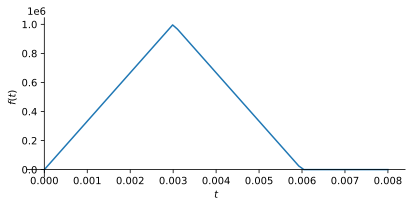

In [13]:
#| label: fig-lastfunktion
#| fig-cap: "Lastfunktion der kurzzeitig einwirkenden Stossbelastung"




F_1 = t*F_max / t_1 
F_2 =  F_1.subs(t,t_1)-((t-t_1)*F_max / t_1)
F_t = sp.Piecewise((F_1,t<t_1), (F_2,t<=t_2), (0, t>t_2))
p_last = sp.plot(F_t.subs(params_plot), (t,0,0.008), size=(5.9,3))



{{< pagebreak >}}

## Musterlösung

In [14]:
#| label: tbl-parameter_impuls
#| tbl-cap: Verwendete Parameter

params_tot = params.copy()
params_tot.update(params_not_relevant)



render.dict_to_table(params_tot)


| Parameter |  |
|---|---|
| $EA_{riegel} = \infty$ | $EA_{stuetze} = \infty$ |
| $EI_{riegel} = \infty$ | $EI_{stuetze} = 23646000.0 \text{m}^{2} \text{N}$ |
| $F_{max} = 1000000 \text{N}$ | $H = 3000 \text{mm}$ |
| $W_{el y} = 938000 \text{mm}^{3}$ | $f_{y} = \frac{355 \text{N}}{\text{mm}^{2}}$ |
| $m_{} = \frac{5000 \text{N} \text{s}^{2}}{\text{m}}$ | $t_{1} = 0.003 \text{s}$ |
| $t_{2} = 0.006 \text{s}$ | $u_{0} = 0.0$ |


### Horizontale Steifigkeit

Für entsprechende Anwendungsfälle gibt es fertige Lösungen zur Bestimmung der Steifigkeit. Gemäss @fig-ems_rahmen_2 ist die Stütze am Fuss- und Kopfpunkt eingespannt. Somit resultiert die Steifigkeit zu:

$$
k_{Stuetze} = \frac{12EI_{Stuetze}}{H^3}
$${#eq-k_fur_stuetze}

Diese gilt für eine einzelne Stütze. Angewendet auf das Beispiel folgt die Systemsteifigkeit zu:


In [15]:
k = 2 * 12 * EI_stuetze / H**3

render.eq_display('k_', k,
                  'k_', k.subs(params).simplify().evalf(3))

    24⋅EI_stuetze
k = ─────────────
           3     
          H      

    2.1e+7⋅newton
k = ─────────────
        meter    

### Eigenkreisfrequenz

In [16]:
omega_n = sp.sqrt(k/m)

render.eq_display('omega_n', 'sqrt(k/m)',
                  'omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

         ___
        ╱ k 
ωₙ =   ╱  ─ 
     ╲╱   m 

               ____________
              ╱ EI_stuetze 
ωₙ = 2⋅√6⋅   ╱  ────────── 
            ╱       3      
          ╲╱       H ⋅m    

      64.8 
ωₙ = ──────
     second

### Bewegungsgleichung

Die Bewegungsgleichung für einen ungedämpften Einmassenschwinger ist die folgende:

$$m u(t)'' + k u(t) = F(t)$$


#### Approximation der Lösung

Es handelt sich um eine inhomogene Differentialgleichung 2.Ordnung. Auf die exakte Lösung der Gleichung wird nicht eingegangen. Es wird versucht die bemessungsrelevanten Parameter näherungsweise zu bestimmen. Dies lässt sich mit dem Impulssatz approximieren. 

$$ F \Delta t = m \Delta v$$

Dieser besagt, dass die einwirkende Kraft $F$ im betrachteten Zeitabschnitt $\Delta t$ der Masse $m$ multipliziert mit der Geschwindigkeitsänderung $\Delta v$ des Objekts entspricht. Für eine kurze Anregung, wie im Beispiel der Fall ist, kann die Anfangsgeschwindigkeit wie folgt bestimmt werden:

$$ v_0 = \frac{I}{m}$$

$$I = \int_{0}^{t_2} F(t) \,dt $$

In [17]:
I = sp.integrate(F_t.subs(params), (t,0,t_2.subs(params)))
v_0 = I / m

## Die Anfangsgeschwindigkeit wird zum Params dict hinzugefügt
params['v_0'] = v_0.subs(params)
params_plot = convert.param_value(params)


render.eq_display('I_', I,
                  'v_0', v_0,
                  'v_0', v_0.subs(params))

I = 3000.0⋅newton⋅second

     3000.0⋅newton⋅second
v₀ = ────────────────────
              m          

     0.6⋅meter
v₀ = ─────────
       second 

Durch die Impuls-Betrachtung vereinfacht sich die Bewegungsgleichung zu:


$$
m u(t)'' + k u(t) = 0
$${#eq-bewegungsgleichung_homogen_ungedaempft}

Mit der Anfangsgeschwindigkeit als Randbedingung. 
$$
u'(t=0) = v_0  
$$
und der Startauslenkung:
$$
u(t=0) = u_0 = 0 
$$

Kann mittels der folgenden Ansatzfunktion die homogene Differentialgleichung gelöst werden:

$$
u(t) = A_1 \cos(\omega_n t) + A_2 \sin(\omega_n t)
$${#eq-ansatz_beweg}


In [18]:
A_1, A_2,u_0 = sp.symbols('A_1:3 u_0')

bewegungsgleichung = m*sp.diff(u,t,2) + k*u
ansatzfunktion = sp.Eq(u,A_1 * sp.cos(omega_n*t) + A_2*sp.sin(omega_n*t))
eq_randbedingung_1 = sp.Eq(u_0,ansatzfunktion.rhs.subs(t,0))
eq_randbedingung_2 = sp.Eq(v_0, sp.diff(ansatzfunktion.rhs,t).subs(t,0))
A_solve = sp.solve([eq_randbedingung_1, eq_randbedingung_2],[A_1, A_2],dict=True)[0]


u_t = ansatzfunktion.subs(A_solve)
u_t.subs(params).simplify().evalf(3)


                  ⎛64.8362038781832⋅t⎞      
u(t) = 0.00925⋅sin⎜──────────────────⎟⋅meter
                  ⎝      second      ⎠      

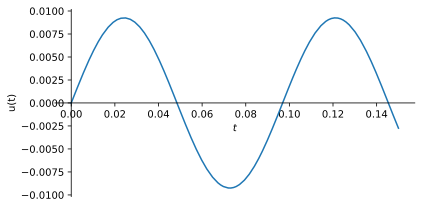

In [19]:
#| label: fig-bewegungsfunk
#| fig-cap: "Zeitlicher Verlauf der Auslenkung"

u_t_plot = u_t.subs(params_plot).rhs/unit.N/unit.second
plot_beweg=sp.plot(u_t_plot, (t,0,0.15), ylabel='u(t)',size=(5.9,3))



### Rückstellkraft

Anhand der maximalen Amplitude lässt sich die maximale Rückstellkraft für den gesamten Rahmen bestimmen.

$$F_R = k   u = k   A$$



In [20]:
t_max = sp.solve(sp.Eq(sp.diff(u_t.rhs,t),0),t)
u_max = u_t.subs(t, t_max[0].subs(params_plot)*unit.second).subs(params).rhs

F_R = k * u_max

render.eq_display('u_max', 'A',
                  'A', u_max.simplify().evalf(3),
                  'F_R', F_R.subs(params).simplify().evalf(3))

uₘₐₓ = A

A = 0.00925⋅meter

F_R = 1.95e+5⋅newton

#### Spannungsnachweis

Die Rückstellkraft wirkt im Zentrum der Masse und bewirkt das maximale Biegemoment bei den Fusspunkten.

![Biegemomentenverlauf durch die statische Ersatzkraft](bilder/impulssatz_momentenverlauf.pdf)

In [21]:
M_max = F_R/2 * H * sp.Rational(0.5)

sigma_max = M_max /W_el_y

render.eq_display('M_max', 'F_R /2 * H * Rational(0.5)',
                  'M_max', M_max.subs(params).simplify().evalf(3),
                  'sigma_max', 'M_max / W_el_y',
                  'sigma_max', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm),
                  'Nachweis', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm)<f_y)

       F_R⋅H
Mₘₐₓ = ─────
         4  

Mₘₐₓ = 1.46e+5⋅meter⋅newton

        Mₘₐₓ 
σₘₐₓ = ──────
       W_el_y

       156.0⋅newton
σₘₐₓ = ────────────
                 2 
       millimeter  

           156.0⋅newton      
Nachweis = ──────────── < f_y
                     2       
           millimeter        

{{< pagebreak >}}

# Beispiel: Dynamischer Vergrösserungsfaktor

## Aufgabenstellung


Das System in @fig-system_biegetrager zeigt einen Biegeträger, gelagert als einfacher Balken mit einer Auskragung. Dieser wird am Kragarm mit der dynamischen Last F(t) in vertikaler Richtung beansprucht. 

![Statisches System des Biegeträgers](bilder/biegetrager_einzelmasse.jpg){#fig-system_biegetrager width=70%}


Gesucht:

- Eigenkreisfrequenz $\omega$
- Dynamischer Vergrösserungsfaktor $V(\omega)$
- Maximale dynamische Amplitude im stationären Fall $u_{max}$
  
Gegeben:

- Biegeträger ist masselos
- Punktmasse $m=1t$
- Dämpfungsrate $\zeta = 0.005$
- Biegesteifigkeit $E\cdot I = 30000 \text{kNm}^2$
- Es sind lediglich Biegeverformungen zu betrachten $G \cdot A = \infty$
$$
F(t) = F_0 \cdot \cos(\omega \cdot t) = 50 \text{kN} \cdot \cos(62.8 \cdot t)
$${#eq-anregung_dynamischer_faktor}

{{< pagebreak >}}

## Musterlösung



In [22]:
#| label: tbl-parameter_vergroess
#| tbl-cap: Verwendete Parameter

params = {'F_0':50*10**3*unit.N,
          'm_':1000*unit.N*unit.second**2/unit.m,
          'zeta':0.005,
          'EI':30000*10**3*unit.N*unit.m**2,
          'l_1':3000*unit.mm,
          'l_2':2000*unit.mm,
          'omega':62.8/unit.second}

params_plot = convert.param_value(params=params)

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $EI = 30000000 \text{m}^{2} \text{N}$ | $F_{0} = 50000 \text{N}$ |
| $l_{1} = 3000 \text{mm}$ | $l_{2} = 2000 \text{mm}$ |
| $m_{} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ | $\omega = \frac{62.8}{\text{s}}$ |
| $\zeta = 0.005$ | |


In [23]:
F_0, m, zeta, EI, l_1, l_2 = sp.symbols('F_0, m_, zeta, EI, l_1, l_2 ')

k, omega, t  = sp.symbols('k omega t')

In [24]:
F_t = F_0*sp.cos(omega*t)

# render.eq_display('F(t)', F_t,
                #   'F(t)', F_t.subs(params))


### Eigenkreisfrequenz

Die Eigenkreisfrequenz lässt sich aus der folgenden Gleichung bestimmen:

$$\omega_n = \sqrt{\frac{k}{m}}$$

#### Steifigkeit des Systems

Die Steifigkeit des Systems lässt sich anhand der statischen Deformation bestimmen. Sie entspricht dem Verhältnis zwischen Einwirkung und der daraus resultierenden Verformung.
$$ k = \frac{F}{u}$$

Händisch lässt sich die Deformation mittels realem und virtuellem Kräftezustand, anhand der Arbeitsgleichung bestimmen. Dargestellt in @fig-arbeitssatz. Die Ermittlung der Steifigkeit bedingt lediglich das Verhältnis zwischen Einwirkung und Deformation, folglich darf Betrag der realen Kraft frei gewählt werden.

![Realer und virtueller Kräftezustand](bilder/arbeitssatz.jpg){#fig-arbeitssatz}

Um lediglich Biegeverformungen zu berücksichtigen, kann die Verformung nach folgender Gleichung bestimmt werden.

$$u = \frac{1}{E I_y} \cdot \int_{0}^{l_1+l_2} M_y\bar{M_y} \,dx$$



In [25]:
u_steifigkeit = 1/EI * (sp.Rational(1,3) * -2000*unit.N*unit.m * -2*unit.m * (l_1+l_2))
k = 1000*unit.N / u_steifigkeit


render.eq_display('u', u_steifigkeit,
                  'u', u_steifigkeit.subs(params).evalf(3),
                  'k', k,
                  'k', k.subs(params))

                        2       
    4000⋅(l₁ + l₂)⋅meter ⋅newton
u = ────────────────────────────
                3⋅EI            

u = 0.222⋅millimeter

           3⋅EI       
k = ──────────────────
                     2
    4⋅(l₁ + l₂)⋅meter 

    4500⋅newton
k = ───────────
     millimeter

#### Eigenkreisfrequenz

In [26]:
omega_n = sp.sqrt(k/m)

render.eq_display('omega_n', "sqrt(k/m)",
                  'omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

         ___
        ╱ k 
ωₙ =   ╱  ─ 
     ╲╱   m 

            _____________
           ╱      EI     
     √3⋅  ╱  ─────────── 
        ╲╱   m⋅(l₁ + l₂) 
ωₙ = ────────────────────
           2⋅meter       

      67.1 
ωₙ = ──────
     second

### Vergrösserungsfaktor

Der Vergrösserungsfaktor beschreibt das Verhältnis zwischen der maximalen statischen Amplitude und der maximalen dynamischen Amplitude:

$$V(\omega) = \frac{u_{max}}{u_0}$$

Dieser lässt sich mit der Dämpfungsrate $\zeta$, Anregungsfrequenz $\omega$ und der Eigenfrequenz $\omega_n$ beschreiben.

![Einfluss der Dämpfung  und der Anregungsfrequenz auf den Vergrösserungsfaktor](bilder/vergroesserung.jpg){#fig-vergroesserung width=80%}

In [27]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ωₙ      ⎝  ωₙ     ⎠  

V(ω) = 8.07

### Statische Amplitude

Die Einwirkung lässt sich aus der Anregungsfunktion @eq-anregung_dynamischer_faktor bestimmen für $t=0$. Mit der bekannten Systemsteifigkeit bestimmt sich die Deformation.

In [28]:
u_stat = F_0 / k

render.eq_display('u_stat', 'F_0 / k',
                  'u_stat', u_stat,
                  'u_stat', u_stat.subs(params).evalf(4))

        F₀
uₛₜₐₜ = ──
        k 

                            2
        4⋅F₀⋅(l₁ + l₂)⋅meter 
uₛₜₐₜ = ─────────────────────
                 3⋅EI        

uₛₜₐₜ = 11.11⋅millimeter

#### Stationäre Amplitude

Durch die Vergrösserung der statischen Deformation mit dem Vergrösserungsfaktor resultiert die maximale Amplitude der stationären Lösung.


In [29]:
u_dyn = u_stat * V_omega

render.eq_display('u_dyn', 'u_stat * V(omega)',
                  'u_dyn', u_dyn,
                  'u_dyn', unit.convert_to(u_dyn.subs(params).simplify().evalf(3), unit.mm))

u_dyn = uₛₜₐₜ⋅V(ω)

                                                       2                      
                                   4⋅F₀⋅(l₁ + l₂)⋅meter                       
u_dyn = ──────────────────────────────────────────────────────────────────────
                   ___________________________________________________________
                  ╱                                                           
                 ╱        2  2                2   ⎛       2                2  
                ╱   16⋅m⋅ω ⋅ζ ⋅(l₁ + l₂)⋅meter    ⎜  4⋅m⋅ω ⋅(l₁ + l₂)⋅meter   
        3⋅EI⋅  ╱    ─────────────────────────── + ⎜- ─────────────────────── +
             ╲╱                 3⋅EI              ⎝            3⋅EI           

     
     
─────
_____
   2 
  ⎞  
  ⎟  
 1⎟  
  ⎠  

u_dyn = 89.6⋅millimeter

Der Nachweis der Gebrauchstauglichkeit wäre damit sicherlich nicht erfüllt.
Das Beispiel soll aufzeigen, wenn die Erregerfrequenz im Bereich der Eigenfrequenz zu liegen kommt, es zu grossen Amplifikationen der Verformungen bzw. zu Resonanzeffekten kommen kann. 

Da meist die Masse und die Erregung (z.B. Maschine) gegeben ist, kann man zum Beispiel ein Dämpfungselement einbauen, was jedoch keinen wesentlichen Einfluss auf das Frequenzverhältnis hat. Dadurch werden jedoch die Amplituden begrenzt. 

Eine weitere Möglichkeit wäre die Biegesteifigkeit $E\cdot I$ zu erhöhen. Das System wird steifer und die Eigenfrequenz grösser. Man spricht in dem Fall von einer Hochabstimmung.


In [30]:
u_p = V_omega.subs(params) * u_stat *sp.cos(omega *t)

# render.eq_display('u_p', u_p.subs(params).simplify().evalf(3))

In [31]:
omega_d = omega_n * sp.sqrt(1-zeta**2)

# render.eq_display('omega_d', 'omega_n *sqrt(1-zeta_**2)',
#                   'omega_d', omega_d.subs(params).simplify().evalf(3))

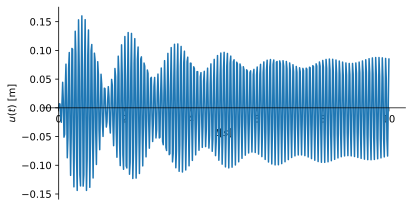

In [32]:
#| label: fig-gesamtantwort_ems3
#| fig-cap: "Gesamtantwort des Systems"


A_1, A_2 = sp.symbols('A_1:3')
omega_d_raw = omega_d*unit.second
omega_n_raw = omega_n * unit.second
u_h_ansatz = sp.exp(-zeta*omega_n_raw*t)*(A_1 * sp.cos(omega_d_raw*t)+A_2*sp.sin(omega_d_raw*t))
randbedingung_1 = (u_h_ansatz+u_p).subs(t,0)
randbedingung_2 = sp.diff((u_h_ansatz+u_p),t).subs(t,0)

A_solve = sp.solve([randbedingung_1, randbedingung_2], [A_1, A_2], dict=True)[0]


u_h = u_h_ansatz.subs(A_solve)


u_t = u_h.subs(params).simplify()/unit.m + u_p.subs(params_plot).simplify()/unit.m**2

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)

plot_gesamt=sp.plot(u_t_plot, (t,0,10), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [m]',
        size=(5.9,3))




In der @fig-gesamtantwort_ems3 ist die Gesamtantwort des Systems dargestellt. Wenn Dämpfung im System vorhanden ist, dann verschwindet die transiente bzw. homogene Lösung $u(t)$ und das System schwingt mit der stationären Lösung bzw. partikulären Lösung $u(t)$ in der Anregungsfrequenz.
Die Anregung zwingt dem System seine Schwingung auf. In der Praxis sind die Anlaufphasen zu beachten, solange die der transiente Teil noch nicht abgeklungen ist. Dort sind die Amplituden grösser und es gilt zu untersuchen, ob diese kurzfristige Überschreitung Konsequenzen (z.B. zul. Verformungen oder Bauteilspannungen) für das Tragsystem hat.

{{< pagebreak >}}

# Beispiel: Gesamtantwort ohne Dämpfung

## Aufgabenstellung

Das System in @fig-system_maschine zeigt ein Stabwerk, welches durch eine Werkzeugmaschine angeregt wird.

![Statisches System des Stabwerks](bilder/ems_4.jpg){#fig-system_maschine}



Gesucht:

- Eigenkreisfrequenz $\omega_n$
- Dynamischer Vergrösserungsfaktor $V(\omega)$
- Stationäre Antwort $u_p(t)$ mit dem dynamischen Vergrösserungsfaktor $V(\omega)$
- Gesamtantwort $u(t)$ mit den Anfangsbedingungen $u(t=0) = 0 \text{ und } u'(t=0)=0$
- Festigkeitsnachweis der Diagonalen
  
Gegeben:

- Gesamtmasse inkl. rotierende Massen $m_{tot} = 5t$
- Rotierende Massen in Werkzeugmaschine $m_1 = 0.2 t$
- Drehzahl Werkzeugmaschine $n = 150/\text{min}$
- Exzentrizität der rotierenden Massen $e =0.1\text{m}$
- Dämpfungsrate $\zeta = 0$
- Punktmasse $m=1t$
- Dämpfungsrate $\zeta = 0.005$
- Alle Stäbe ausser Diagonalen $E\cdot A = \infty$
- Alle Stäbe S355 

{{< pagebreak >}}

## Musterlösung




In [33]:
#| label: tbl-parameter_gesamt
#| tbl-cap: Verwendete Parameter

params = {              
          'm_tot':5000*unit.N*unit.second**2/unit.m, 
          'E':210*10**3*unit.N/unit.mm**2,
          'H':4000*unit.mm,
          'B':6000*unit.mm,
          '\oslash_Diag':12*unit.mm,
          'f_yd':338*unit.N/unit.mm**2,
          'm_1':200*unit.N*unit.second**2/unit.m,
          'n':150/unit.minute,
          'e':0.1*unit.m,
          'zeta':0.0,
          }

params_plot = convert.param_value(params=params)

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $B = 6000 \text{mm}$ | $E = \frac{210000 \text{N}}{\text{mm}^{2}}$ |
| $H = 4000 \text{mm}$ | $\oslash_{Diag} = 12 \text{mm}$ |
| $e = 0.1 \text{m}$ | $f_{yd} = \frac{338 \text{N}}{\text{mm}^{2}}$ |
| $m_{1} = \frac{200 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{tot} = \frac{5000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $n = \frac{150}{\text{minute}}$ | $\zeta = 0.0$ |


In [34]:
m_tot, E, H, B, Diam, f_yd, m_1, n, e = sp.symbols('m_tot, E, H, B, \oslash_Diag, f_yd, m_1, n, e')

F_0, omega, t, zeta = sp.symbols('F_0, omega, t, zeta')

In [35]:
F_t = F_0 * sp.cos(omega*t)

### Systemsteifigkeit

Zur Ermittlung der Eigenkreisfrequenz wird die Steifigkeit des gesamten Systems benötigt.

![Verformungszustand des Systems für die Einheitskraft](bilder/auslenkunf_FW.jpg){#fig-verform_FW}

Das System wird mit einer Einheitskraft belastet. Aufgrund der Eigenschaften der Pendelstäbe (lediglich Normalkräfte) und deren unendlich grossen Dehnsteifigkeit, spielt lediglich die Verformung der Diagonalen eine Rolle. Dazu gilt, dass die Diagonalen nur Zugkräfte aufnehmen können. Das bedeutet, dass letztlich ein Stab aktiv ist für die beschrieben Situation in @fig-verform_FW.

Dazu muss die Normalkraft in der Diagonalen bestimmt werden.

In [36]:
alpha = sp.atan(H/B)

Z_Diag = 1000*unit.N /sp.cos(alpha)


render.eq_display('alpha', alpha,
                  'alpha', alpha.subs(params).evalf(3),
                  'Z_Diag', Z_Diag,
                  'Z_Diag',Z_Diag.subs(params).evalf(3))

        ⎛H⎞
α = atan⎜─⎟
        ⎝B⎠

α = 0.588

                    ________       
                   ╱      2        
                  ╱      H         
Z_Diag = 1000⋅   ╱   1 + ── ⋅newton
                ╱         2        
              ╲╱         B         

Z_Diag = 1.2e+3⋅newton

Mittels der Arbeitsgleichung lässt sich die Verformung bestimmen. Für die Integration zweier Normalkraftverläufe gilt die folgende Beziehung:

$$u = \frac{1}{EA_{Diag}}  \int_{0}^{l_{Diag}} N_x\bar{N_x} \,dx$$

Länge der Diagonalen:


In [37]:
l_Diag = B /sp.cos(alpha)
A_Diag = sp.pi * Diam**2 / 4
u_for_k = 1/(E*A_Diag) * Z_Diag * Z_Diag/(1000*unit.N) * l_Diag

k = 1000*unit.N / u_for_k
render.eq_display('l_Diag', l_Diag,
                  'l_Diag', unit.convert_to(l_Diag.subs(params).evalf(3), unit.m),)

                 ________
                ╱      2 
               ╱      H  
l_Diag = B⋅   ╱   1 + ── 
             ╱         2 
           ╲╱         B  

l_Diag = 7.21⋅meter

Querschnittsfläche der Diagonalen:

In [38]:
render.eq_display('A_Diag', A_Diag,
                  'A_Diag', A_Diag.subs(params).evalf(3))

                       2
         π⋅\oslash_Diag 
A_Diag = ───────────────
                4       

                         2
A_Diag = 113.0⋅millimeter 

Deformation der Diagonalen

In [39]:
render.eq_display(
                  'u_k', u_for_k,
                  'u_k', u_for_k.subs(params).evalf(3))

                    3/2       
            ⎛     2⎞          
            ⎜    H ⎟          
     4000⋅B⋅⎜1 + ──⎟   ⋅newton
            ⎜     2⎟          
            ⎝    B ⎠          
uₖ = ─────────────────────────
                         2    
         π⋅E⋅\oslash_Diag     

uₖ = 0.439⋅millimeter

Steifigkeit des Systems:

In [40]:
render.eq_display('k', 'F/u_k',
                  'k', k.subs(params).evalf(3))

    F 
k = ──
    uₖ

    2.28e+3⋅newton
k = ──────────────
      millimeter  

### Eigenkreisfrequenz

Aus der Systemsteifigkeit lässt sich leicht die Eigenkreisfrequenz bestimmen:

$$\omega_n =\sqrt{\frac{k}{m}}$$

In [41]:
omega_n = sp.sqrt(k/m_tot)

render.eq_display('omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

                  ____________________
                 ╱                2   
                ╱   E⋅\oslash_Diag    
     √π⋅       ╱   ────────────────── 
              ╱                   3/2 
             ╱            ⎛     2⎞    
            ╱             ⎜    H ⎟    
           ╱       B⋅mₜₒₜ⋅⎜1 + ──⎟    
          ╱               ⎜     2⎟    
        ╲╱                ⎝    B ⎠    
ωₙ = ─────────────────────────────────
                     2                

      21.4 
ωₙ = ──────
     second

### Dynamischer Vergrösserungsfaktor

#### Anregungsfunktion

Zur Bestimmung des dynamischen Vergrösserungsfaktor wird die stationäre Verformung benötigt.  Diese lässt sich aus der Anfangskraft der Anregungsfunktion ermitteln. Dazu wird diese Funktion benötigt. Wir wissen die Drehzahl $n$ und die Exzentrizität $e$ sowie deren Masse $m_1$.

In [42]:
f = unit.convert_to(n.subs(params),unit.second)
omega = 2*sp.pi*f
params['omega'] = omega.subs(params).simplify()

render.eq_display('f', 'n',
                  'f', f.evalf(3),
                  'omega', '2*pi*f',
                  'omega', omega.evalf(3),
                  )

f = n

     2.5  
f = ──────
    second

ω = 2⋅π⋅f

     15.7 
ω = ──────
    second

Nun fehlt lediglich die Anfangskraft $F_0$. Die Fliehkraft $F$ der 2 gegenläufig rotierenden Massen bewirken eine addierende Fliehkraft in horizontaler Richtung zu:

$$F_0 = 2(m_1 \cdot e \cdot \omega^2)$$


In [43]:
F_0 = 2*(m_1*e*omega**2)
params['F_0'] = F_0.subs(params).simplify()
render.eq_display('F_0', F_0,
                  'F_0', F_0.subs(params).simplify().evalf(3))

         2     
     50⋅π ⋅e⋅m₁
F₀ = ──────────
            2  
      second   

F₀ = 9.87e+3⋅newton

#### Statische Deformation

Die statische Deformation lässt sich nun leicht anhand der ermittelten Systemsteifigkeit herleiten.

In [44]:
u_0 = F_0/k

render.eq_display(
    'u_0', 'F_0/k',
    'u_0', u_0.subs(params).simplify().evalf(3))

     F₀
u₀ = ──
     k 

u₀ = 4.33⋅millimeter

#### Vergrösserungsfaktor

In [45]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ωₙ      ⎝  ωₙ     ⎠  

V(ω) = 2.18

### Stationäre Antwort

Es handelt sich um einen ungedämpften Einmassenschwinger mit einer harmonischen Anregungsfunktion. Die Bewegungsgleichung ist die folgende:

$$mu''(t)+ ku(t) = F(t)$$

Dies ist eine inhomogene Differentialgleichung 2. Ordnung. Die Lösung dieser lässt sich in einen partikulären Anteil und in einen homogenen Anteil aufteilen. Der partikuläre Anteil entspricht der stationären Antwort. Der homogene Anteil nennt sich transienter Anteil. Wäre eine Dämpfung im System vorhanden, so startet der Schwungvorgang aus einer Kombination beider Teile. Aufgrund der Dämpfung verschwindet der stationäre Anteil und das System wird schlussendlich nur noch durch den transienten Anteil deformiert. 

Anhand des Vergrösserungsfaktor kann die stationäre dynamische Antwort des Systems mit der folgenden Beziehung ermittelt werden.

$$u_p = V(\omega)u_0 \cdot \cos{(\omega t)}$$



In [46]:
u_p = V_omega * u_0 *sp.cos(omega *t)

render.eq_display('u_p', u_p.subs(params).simplify().evalf(3))

             ⎛5⋅π⋅t ⎞           
uₚ = 9.43⋅cos⎜──────⎟⋅millimeter
             ⎝second⎠           

### Gesamtantwort

Für die Gesamtantwort wird nun noch der homogene Anteil benötigt. Dazu ist die folgende Differentialgleichung zu lösen.

$$mu''(t)+ ku(t) = 0$$

Als Ansatzfunktion dient die folgende Gleichung:

$$u_h = A_1\cos{(\omega_n t)} + A_2 \sin{(\omega_n t)}$$


Die Randbedingungen sind in der Aufgabenstellung definiert und sind die folgenden:

$u(t=0)=0$

$u'(t=0)=0$

Vorsicht, die Randbedingungen gelten für die gesamte Lösung:

$$u(t) = u_h(t) + u_p(t)$$

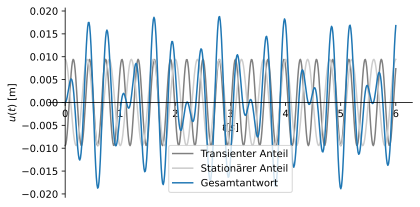

In [47]:
#| label: fig-gesamtantwort_ems4
#| fig-cap: "Antworten des Systems ohne Dämpfung"


A_1, A_2 = sp.symbols('A_1:3')

u_h_ansatz = A_1 * sp.cos(omega_n*t)+A_2*sp.sin(omega_n*t)
randbedingung_1 = (u_h_ansatz+u_p).subs(t,0)
randbedingung_2 = sp.diff((u_h_ansatz+u_p),t).subs(t,0)

A_solve = sp.solve([randbedingung_1, randbedingung_2], [A_1, A_2], dict=True)[0]


u_h = u_h_ansatz.subs(A_solve)


u_t = u_h+u_p

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)
u_p_plot = u_p.subs(params_plot).subs(unit.second, 1)
u_h_plot = u_h.subs(params_plot).subs(unit.second, 1)

p_1 = sp.plot(u_h_plot, (t,0,6), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [m]',
        size=(5.9,3),show=False,label='Transienter Anteil', legend=True, line_color='0.5')

p_2 = sp.plot(u_p_plot, (t,0,6), adaptive=False, nb_of_points=500,show=False,label='Stationärer Anteil', line_color='0.8')

p_3 = sp.plot(u_t_plot, (t,0,6), adaptive=False, nb_of_points=500,show=False,label='Gesamtantwort')


p_1.append(p_2[0])
p_1.append(p_3[0])

p_1.show()

### Festigkeitsnachweis

Aufgrund der maximalen Auslenkung, kann die maximale Normalkraft auf der Diagonalen bestimmt werden.

#### Maximale Auslenkung

Aus dem Plot in @fig-gesamtantwort_ems4 ist die maximale Auslenkung ersichtlich. Die Ermittlung des Zeitpunkts bei einer maximalen Auslenkung wird hier numerisch gelöst.

In [48]:
t_max_auslenkung = sp.nsolve(sp.diff(u_t_plot,t), t,(2.6,2.8))

u_max = u_t_plot.subs(t,t_max_auslenkung)


render.eq_display('t_max', (t_max_auslenkung*unit.second).evalf(3),
                  'u_max', (u_max*unit.m).evalf(3))

tₘₐₓ = 2.8⋅second

uₘₐₓ = 0.0188⋅meter

#### Maximale Einwirkung

Aufgrund der maximalen Amplitude verlängert sich die Diagonale um $\Delta l = u_{max}$. Die Dehnung des Stabs ist somit die $\frac{\Delta l}{l_{Diag}}$. Bei linear elastischem Materialverhalten gilt die folgende Beziehung:

$$\sigma = \varepsilon E$$

In [49]:
epsilon = u_max*unit.m / sp.cos(alpha) / l_Diag
sigma = epsilon*E

Nachweis = sigma / f_yd

render.eq_display('varepsilon', epsilon.subs(params).simplify().evalf(3),
                  'sigma', unit.convert_to(sigma.subs(params).simplify().evalf(3), unit.mm**2),
                  'f_yd', f_yd.subs(params),
                  'Nachweis', 'sigma / f_yd',
                  'Nachweis', Nachweis.subs(params).simplify().evalf(3))

varepsilon = 0.00314

    659.0⋅newton
σ = ────────────
              2 
    millimeter  

        338⋅newton
f_yd = ───────────
                 2
       millimeter 

            σ  
Nachweis = ────
           f_yd

Nachweis = 1.95

Die Diagonale würde plastifizieren, so dass die linearen Annahmen für die Berechnung der Systemantwort nicht angewendet werden dürfen.

{{< pagebreak >}}

# Beispiel: Gesamtantwort mit Dämpfung

## Aufgabenstellung

Das System in @fig-system5 entspricht dem System in @fig-system_maschine. Ergänzt wurde dies mit einem Dämpfungselement.

![Statisches System](bilder/ems_5.jpg){#fig-system5}

Gesucht:

- Dynamischer Vergrösserungsfaktor $V(\omega)$
- Stationäre Amplitude
- Festigkeitsnachweis der Diagonalen

Gegeben:

- Gesamtmasse inkl. rotierende Massen $m_{tot} = 5t$
- Rotierende Massen in Werkzeugmaschine $m_1 = 0.2 t$
- Drehzahl Werkzeugmaschine $n = 150/\text{min}$
- Exzentrizität der rotierenden Massen $e =0.1\text{m}$
- Dämpfungsrate $\zeta = 0$
- Punktmasse $m=1t$
- Dämpfungsrate $\zeta = 0.005$
- Alle Stäbe ausser Diagonalen $E\cdot A = \infty$
- Alle Stäbe S355 



{{< pagebreak >}}

## Musterlösung

In [50]:
#| label: tbl-parameter_gesamt_dampf
#| tbl-cap: Verwendete Parameter

params = {              
          'm_tot':5000*unit.N*unit.second**2/unit.m, 
          'E':210*10**3*unit.N/unit.mm**2,
          'H':4000*unit.mm,
          'B':6000*unit.mm,
          '\oslash_Diag':12*unit.mm,
          'f_yd':338*unit.N/unit.mm**2,
          'm_1':200*unit.N*unit.second**2/unit.m,
          'n':150/unit.minute,
          'e':0.1*unit.m,
          'zeta':0.2,
          }

params_plot = convert.param_value(params=params)

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $B = 6000 \text{mm}$ | $E = \frac{210000 \text{N}}{\text{mm}^{2}}$ |
| $H = 4000 \text{mm}$ | $\oslash_{Diag} = 12 \text{mm}$ |
| $e = 0.1 \text{m}$ | $f_{yd} = \frac{338 \text{N}}{\text{mm}^{2}}$ |
| $m_{1} = \frac{200 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{tot} = \frac{5000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $n = \frac{150}{\text{minute}}$ | $\zeta = 0.2$ |


In [51]:
m_tot, E, H, B, Diam, f_yd, m_1, n, e = sp.symbols('m_tot, E, H, B, \oslash_Diag, f_yd, m_1, n, e')

F_0, omega, t, zeta = sp.symbols('F_0, omega, t, zeta')

In [52]:
F_t = F_0 * sp.cos(omega*t)

### Systemsteifigkeit

Zur Ermittlung der Eigenkreisfrequenz wird die Steifigkeit des gesamten Systems benötigt.

![Verformungszustand des Systems für die Einheitskraft](bilder/auslenkunf_FW.jpg){#fig-verform_FW}

Das System wird mit einer Einheitskraft belastet. Aufgrund der Eigenschaften der Pendelstäbe (lediglich Normalkräfte) und deren unendlich grossen Dehnsteifigkeit, spielt lediglich die Verformung der Diagonalen eine Rolle. Dazu gilt, dass die Diagonalen nur Zugkräfte aufnehmen können. Das bedeutet, dass letztlich ein Stab aktiv ist für die beschrieben Situation in @fig-verform_FW.

Dazu muss die Normalkraft in der Diagonalen bestimmt werden.

In [53]:
alpha = sp.atan(H/B)

Z_Diag = 1000*unit.N /sp.cos(alpha)


render.eq_display('alpha', alpha,
                  'alpha', alpha.subs(params).evalf(3),
                  'Z_Diag', Z_Diag,
                  'Z_Diag',Z_Diag.subs(params).evalf(3))

        ⎛H⎞
α = atan⎜─⎟
        ⎝B⎠

α = 0.588

                    ________       
                   ╱      2        
                  ╱      H         
Z_Diag = 1000⋅   ╱   1 + ── ⋅newton
                ╱         2        
              ╲╱         B         

Z_Diag = 1.2e+3⋅newton

Mittels der Arbeitsgleichung lässt sich die Verformung bestimmen. Für die Integration zweier Normalkraftverläufe gilt die folgende Beziehung:

$$u = \frac{1}{EA_{Diag}}  \int_{0}^{l_{Diag}} N_x\bar{N_x} \,dx$$

Länge der Diagonalen:

In [54]:
l_Diag = B /sp.cos(alpha)
A_Diag = sp.pi * Diam**2 / 4
u_for_k = 1/(E*A_Diag) * Z_Diag * Z_Diag/(1000*unit.N) * l_Diag

k = 1000*unit.N / u_for_k
render.eq_display('l_Diag', l_Diag,
                  'l_Diag', unit.convert_to(l_Diag.subs(params).evalf(3), unit.m),)

                 ________
                ╱      2 
               ╱      H  
l_Diag = B⋅   ╱   1 + ── 
             ╱         2 
           ╲╱         B  

l_Diag = 7.21⋅meter

Querschnittsfläche der Diagonalen:

In [55]:
render.eq_display('A_Diag', A_Diag,
                  'A_Diag', A_Diag.subs(params).evalf(3))

                       2
         π⋅\oslash_Diag 
A_Diag = ───────────────
                4       

                         2
A_Diag = 113.0⋅millimeter 

Deformation der Diagonalen

In [56]:
render.eq_display(
                  'u_k', u_for_k,
                  'u_k', u_for_k.subs(params).evalf(3))

                    3/2       
            ⎛     2⎞          
            ⎜    H ⎟          
     4000⋅B⋅⎜1 + ──⎟   ⋅newton
            ⎜     2⎟          
            ⎝    B ⎠          
uₖ = ─────────────────────────
                         2    
         π⋅E⋅\oslash_Diag     

uₖ = 0.439⋅millimeter

Steifigkeit des Systems:

In [57]:
render.eq_display('k', 'F/u_k',
                  'k', k.subs(params).evalf(3))

    F 
k = ──
    uₖ

    2.28e+3⋅newton
k = ──────────────
      millimeter  

### Eigenkreisfrequenz

Aus der Systemsteifigkeit lässt sich leicht die Eigenkreisfrequenz bestimmen:

$$\omega_n =\sqrt{\frac{k}{m}}$$

In [58]:
omega_n = sp.sqrt(k/m_tot)

render.eq_display('omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

                  ____________________
                 ╱                2   
                ╱   E⋅\oslash_Diag    
     √π⋅       ╱   ────────────────── 
              ╱                   3/2 
             ╱            ⎛     2⎞    
            ╱             ⎜    H ⎟    
           ╱       B⋅mₜₒₜ⋅⎜1 + ──⎟    
          ╱               ⎜     2⎟    
        ╲╱                ⎝    B ⎠    
ωₙ = ─────────────────────────────────
                     2                

      21.4 
ωₙ = ──────
     second

### Dynamischer Vergrösserungsfaktor

#### Anregungsfunktion

Zur Bestimmung des dynamischen Vergrösserungsfaktor wird die stationäre Verformung benötigt.  Diese lässt sich aus der Anfangskraft der Anregungsfunktion ermitteln. Dazu wird diese Funktion benötigt. Wir wissen die Drehzahl $n$ und die Exzentrizität $e$ sowie deren Masse $m_1$.

In [59]:
f = unit.convert_to(n.subs(params),unit.second)
omega = 2*sp.pi*f
params['omega'] = omega.subs(params).simplify()

render.eq_display('f', 'n',
                  'f', f.evalf(3),
                  'omega', '2*pi*f',
                  'omega', omega.evalf(3),
                  )

f = n

     2.5  
f = ──────
    second

ω = 2⋅π⋅f

     15.7 
ω = ──────
    second

Nun fehlt lediglich die Anfangskraft $F_0$. Die Fliehkraft $F$ der 2 gegenläufig rotierenden Massen bewirken eine addierende Fliehkraft in horizontaler Richtung zu:

$$F_0 = 2(m_1 \cdot e \cdot \omega^2)$$


In [60]:
F_0 = 2*(m_1*e*omega**2)
params['F_0'] = F_0.subs(params).simplify()
render.eq_display('F_0', F_0,
                  'F_0', F_0.subs(params).simplify().evalf(3))

         2     
     50⋅π ⋅e⋅m₁
F₀ = ──────────
            2  
      second   

F₀ = 9.87e+3⋅newton

#### Statische Deformation

Die statische Deformation lässt sich nun leicht anhand der ermittelten Systemsteifigkeit herleiten.

In [61]:
u_0 = F_0/k

render.eq_display('u_0', u_0.subs(params).simplify().evalf(3))

u₀ = 4.33⋅millimeter

#### Vergrösserungsfaktor

In [62]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ωₙ      ⎝  ωₙ     ⎠  

V(ω) = 1.83

### Stationäre Antwort

Es handelt sich um einen gedämpften Einmassenschwinger mit einer harmonischen Anregungsfunktion. Die Bewegungsgleichung ist die folgende:

$$mu''(t)+ cu'(t) + ku(t) = F(t)$$

Dies ist eine inhomogene Differentialgleichung 2. Ordnung. Die Lösung dieser lässt sich in einen partikulären Anteil und in einen homogenen Anteil aufteilen. Der partikuläre Anteil entspricht der stationären Antwort. Der homogene Anteil nennt sich transienter Anteil. 

Anhand des Vergrösserungsfaktor kann die stationäre dynamische Antwort des Systems mit der folgenden Beziehung ermittelt werden.

$$u_p = V(\omega)u_0 * \cos{(\omega t)}$$



In [63]:
u_p = V_omega * u_0 *sp.cos(omega *t)

render.eq_display('u_p', u_p.subs(params).simplify().evalf(3))

                ⎛5⋅π⋅t ⎞      
uₚ = 0.00793⋅cos⎜──────⎟⋅meter
                ⎝second⎠      

### Gesamtantwort

Für die Gesamtantwort wird nun noch der homogene Anteil benötigt. Dazu ist die folgende Differentialgleichung zu lösen.

$$mu''(t)+ cu'(t) + ku(t) = 0$$

Als Ansatzfunktion dient die folgende Gleichung:

$$u_h = e^{-\zeta \omega_n t} (A_1\cos{(\omega_d t)} + A_2 \sin{(\omega_d t)})$$


Die Randbedingungen sind in der Aufgabenstellung definiert und sind die folgenden:

$u(t=0)=0$

$u'(t=0)=0$

Vorsicht, die Randbedingungen gelten für die gesamte Lösung:

$$u(t) = u_h(t) + u_p(t)$$

#### Gedämpfte Eigenkreisfrequenz

In [64]:
omega_d = omega_n * sp.sqrt(1-zeta**2)

render.eq_display('omega_d', 'omega_n *sqrt(1-zeta_**2)',
                  'omega_d', omega_d.subs(params).simplify().evalf(3))

            ________
           ╱      2 
ω_d = ωₙ⋅╲╱  1 - ζ  

       20.9 
ω_d = ──────
      second

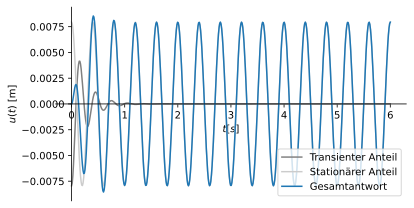

In [65]:
#| label: fig-gesamtantwort_ems5
#| fig-cap: "Gesamtantwort des Systems"


A_1, A_2 = sp.symbols('A_1:3')

u_h_ansatz = sp.exp(-zeta*omega_n*t)*(A_1 * sp.cos(omega_d*t)+A_2*sp.sin(omega_d*t))
randbedingung_1 = (u_h_ansatz+u_p).subs(t,0)
randbedingung_2 = sp.diff((u_h_ansatz+u_p),t).subs(t,0)

A_solve = sp.solve([randbedingung_1, randbedingung_2], [A_1, A_2], dict=True)[0]


u_h = u_h_ansatz.subs(A_solve)


u_t = u_h + u_p

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)
u_p_plot = u_p.subs(params_plot).subs(unit.second, 1)
u_h_plot = u_h.subs(params_plot).subs(unit.second, 1)

p_1 = sp.plot(u_h_plot, (t,0,6), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [m]',
        size=(5.9,3),show=False,label='Transienter Anteil', legend=True, line_color='0.5')

p_2 = sp.plot(u_p_plot, (t,0,6), adaptive=False, nb_of_points=500,show=False,label='Stationärer Anteil', line_color='0.8')

p_3 = sp.plot(u_t_plot, (t,0,6), adaptive=False, nb_of_points=500,show=False,label='Gesamtantwort')

p_1.append(p_2[0])
p_1.append(p_3[0])

p_1.show()

### Festigkeitsnachweis

Aufgrund der maximalen Auslenkung, kann die maximale Normalkraft auf der Diagonalen bestimmt werden.

#### Maximale Auslenkung

Aus dem Plot in @fig-gesamtantwort_ems5 ist die maximale Auslenkung ersichtlich. Die Ermittlung des Zeitpunkts bei einer maximalen Auslenkung wird hier numerisch gelöst.

In [66]:
t_max_auslenkung = sp.nsolve(sp.diff(u_t_plot,t), t,(0.3,0.5))

u_max = u_t_plot.subs(t,t_max_auslenkung)


render.eq_display('t_max', (t_max_auslenkung*unit.second).evalf(2),
                  'u_max', u_max.evalf(3)*unit.m)

tₘₐₓ = 0.41⋅second

uₘₐₓ = 0.00855⋅meter

#### Maximale Einwirkung

Aufgrund der maximalen Amplitude verlängert sich die Diagonale um $\Delta l=u_{max}$. Die Dehnung des Stabs ist somit die $\frac{\Delta l}{l_{Diag}}$. Bei linear elastischem Materialverhalten gilt die folgende Beziehung:

$$\sigma = \varepsilon E$$

In [67]:
epsilon = u_max*unit.m / sp.cos(alpha) / l_Diag
sigma = epsilon*E

Nachweis = sigma / f_yd

render.eq_display('varepsilon', epsilon.subs(params).simplify().evalf(3),
                  'sigma', unit.convert_to(sigma.subs(params).simplify().evalf(3), unit.mm**2),
                  'f_yd', f_yd.subs(params),
                  'Nachweis', 'sigma / f_yd',
                  'Nachweis', Nachweis.subs(params).simplify().evalf(3))

varepsilon = 0.00142

    299.0⋅newton
σ = ────────────
              2 
    millimeter  

        338⋅newton
f_yd = ───────────
                 2
       millimeter 

            σ  
Nachweis = ────
           f_yd

Nachweis = 0.885

Die Diagonale bleibt im elastichen Bereich, so dass die linearen Annahmen gültig sind.
Der Festigkeitsnachweis für die Diagonale ist erfüllt.
Im Weiteren wäre der Grenzustand der Tragfähigkeit *Ermüdung* zu prüfen.

{{< pagebreak >}}

# Beispiel: Fourier-Transformation

## Aufgabenstellung


Nachfolgend ist ein unterspannter Träger gezeigt, der durch eine periodische Rechteckanregung dynamisch beansprucht wird.

![Statisches System](bilder/ems6.jpg){#fig-statisch_system width=50%}

Gesucht:

- Eigenkreisfrequenz $\omega_n$
- Stationäre Amplitude der Verschiebung
- Staionäre Amplitude der Beschleunigung

Gegeben:

- Elastizitätsmodul $E = 200000 \text{N}/\text{mm}^2$
- Biegestab $I = 2\cdot 10^8 \text{mm}^4$ und $E\cdot A = \infty$
- Fachwerkstäbe $A = 3000 \text{mm}^2$
- Einzelmasse $m=1000 \text{kg}$
- Kraftamplitude $A = 1 \text{kN}$
- Rechteckanregung in @fig-rechteckanregung


In [68]:
x, t = sp.symbols("x t")

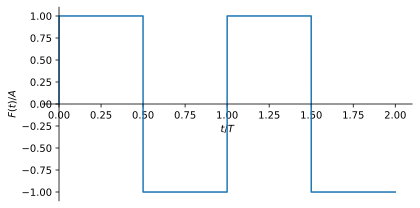

In [69]:
#| label: fig-rechteckanregung
#| fig-cap: "Rechteckige Anregungsfunktion"

signal_xt = sp.Piecewise((0,t<=0),(1,t<=0.5),(-1,t<=1), (1,t<=1.5), (-1,t<=2), (0,t>2))

p_1 = sp.plot(signal_xt, (t,0,2), 
        xlabel='$t/T$',
        ylabel='$F(t) / A$',
        size=(5.9,3),show=False)

p_1.show()


{{< pagebreak >}}
## Musterlösung

In [70]:
#| label: tbl-parameter_fourier
#| tbl-cap: Verwendete Parameter

params = {'E': 200000 *unit.N/unit.mm**2,
          'I_Balken':2*10**8 *unit.mm**4,
          'A_Fachwerk':3000*unit.mm**2,
          'm_':1000*unit.N*unit.second**2/unit.m,
          'A':1*10**3*unit.N,
          'l':5*unit.m,
          'h':2*unit.m,
          'zeta':0.0,
          }


render.dict_to_table(params)

| Parameter |  |
|---|---|
| $A = 1000 \text{N}$ | $A_{Fachwerk} = 3000 \text{mm}^{2}$ |
| $E = \frac{200000 \text{N}}{\text{mm}^{2}}$ | $I_{Balken} = 200000000 \text{mm}^{4}$ |
| $h = 2 \text{m}$ | $l = 5 \text{m}$ |
| $m_{} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ | $\zeta = 0.0$ |


In [71]:
omega, t, E, I_Balken, A_Fachwerk, m_, A, l, h, zeta = sp.symbols('omega, t, E, I_Balken, A_Fachwerk, m_, A, l, h, zeta')

### Erregerfunktion

Die periodische Erregerfunktion wird mit einer Fourier-Reihenentwicklung approximiert um eine periodisch, harmonische Funktion zu generieren.

Die Reihenentwicklung folgt folgender Funktion:

$$F(t) = A_0 + \sum_{n=1}^{\infty}(a_n\cdot \cos{(n\omega t)}+b_n \cdot \sin{(n\omega t)})$$

Die Aufgabenstellung fordert lediglich die ersten drei Teile der Reihe.

$$F(t) = A_0 + \sum_{n=1}^{3}(a_n \cdot \cos{(n\omega t)}+b_n \cdot \sin{(n\omega t)})$$

Nach Bestimmung der Konstanten folgt die Gleichung zu:

$$F(t) = \frac{4A}{\pi} \cdot [\sin(\omega t) + \frac{1}{3}\sin(3\omega t) + \frac{1}{5}\sin(5 \omega t)]$$

In [72]:
f_Anregung = 1/unit.seconds
omega = f_Anregung * 2*sp.pi

F_t = 4*A/ sp.pi * (sp.sin(omega*t)+sp.Rational(1,3)*sp.sin(3*omega *t)+ sp.Rational(1,5)*sp.sin(5*omega*t))


render.eq_display('f_Anregung', f_Anregung,
                  'omega', omega.subs(params).evalf(3),
                  'F(t)', F_t)

               1   
f_Anregung = ──────
             second

     6.28 
ω = ──────
    second

           ⎛                 ⎛6⋅π⋅t ⎞      ⎛10⋅π⋅t⎞⎞
           ⎜              sin⎜──────⎟   sin⎜──────⎟⎟
           ⎜   ⎛2⋅π⋅t ⎞      ⎝second⎠      ⎝second⎠⎟
       4⋅A⋅⎜sin⎜──────⎟ + ─────────── + ───────────⎟
           ⎝   ⎝second⎠        3             5     ⎠
F(t) = ─────────────────────────────────────────────
                             π                      

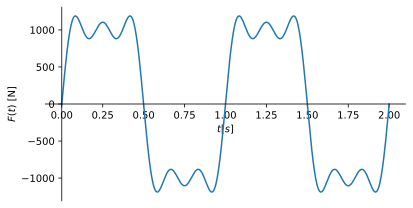

In [73]:

#| label: fig-anregung_fourier
#| fig-cap: "Anregungsfunktion mit Fourier-Reihe approximiert"
params_plot = convert.param_value(params)

F_t_plot = F_t.subs(params_plot).subs(unit.second, 1)

plot_fourier = sp.plot(F_t_plot, (t,0,2), adaptive=False, nb_of_points=500,
        xlabel='$t [s]$',
        ylabel='$F(t)$ [N]',
        size=(5.9,3))



### Systemsteifigkeit

Anhand der Arbeitsgleichung wird die Deformation bestimmt und daraus die Steifigkeit des Systems. Auf die Bestimmung der Schnittgrössen wird nicht eingegangen. Es handelt sich um ein statisch unbestimmtes System.

![Schnittgrössen des unterspannten Balkens](bilder/schnittgr%C3%B6ssen.jpg){#fig-schnittgroessen}

Da der Balken dehnstarr ist und die Unterspannung aus Pendelstäben zusammengesetzt ist, sind Anteile aus Normalkraft aus den Pendelstäben und lediglich Anteile aus Biegung im Balken für die Deformation zuständig.

In [74]:
u_for_k_balken = 1/3 * 0.163*10**6*unit.N*unit.mm * 0.163 *unit.m* 2*l / (E*I_Balken) 
u_for_k_fachwerk = (1*-0.935*10**3*unit.N*-0.935 * h + 2*1.258*10**3*unit.N*1.258*sp.sqrt(h**2+l**2))/(E*A_Fachwerk)

u_for_k = u_for_k_balken + u_for_k_fachwerk
k = 1000*unit.N / u_for_k

render.eq_display('u_k', unit.convert_to(u_for_k.subs(params).simplify().evalf(3),unit.mm),
                  'k', k.subs(params).simplify().evalf(3))


uₖ = 0.0335⋅millimeter

    2.98e+7⋅newton
k = ──────────────
        meter     

### Eigenkreisfrequenz


Aus der Systemsteifigkeit lässt sich leicht die Eigenkreisfrequenz bestimmen:

$$\omega_n =\sqrt{\frac{k}{m}}$$

In [75]:
omega_n = sp.sqrt(k/m_)

render.eq_display('omega_n', omega_n.subs(params).simplify().evalf(3))

     173.0 
ωₙ = ──────
     second

### Stationäre Amplitude der Verschiebung

Die statische Durchbiegung lässt sich anhand der Systemsteifigkeit und der Anfangskraft der Anregungsfunktion bestimmen. Mittels des Vergrösserungsfaktors lässt sich schlussendlich die stationäre maximale Amplitude bestimmen. Der Vergrösserungsfaktor ist abhängig von der Anregungsfrequenz, welche wir mit der Fourier-Reihenentwicklung approximiert haben. Wir haben folglich *"3 verschiedene"* Anregungsfrequenzen mit der entsprechenden Gewichtung.

In [76]:
u_0 = 4*A/sp.pi /k

V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2)) + 1/(sp.sqrt((1-(3*omega/omega_n)**2)**2 + (2*zeta*(3*omega/omega_n))**2))/3 + 1/(sp.sqrt((1-(5*omega/omega_n)**2)**2 + (2*zeta*(5*omega/omega_n))**2))/5


render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2)) + 1/(sqrt((1-(3*omega/omega_n)**2)**2 + (2*zeta_*(3*omega/omega_n))**2))/3 + 1/(sqrt((1-(5*omega/omega_n)**2)**2 + (2*zeta_*(5*omega/omega_n))**2))/5',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

u_stat = u_0 * V_omega

render.eq_display('u_0', unit.convert_to(u_0.subs(params).simplify().evalf(3),
 unit.mm),
 'u_stat', unit.convert_to(u_stat.subs(params).simplify().evalf(3), unit.mm))

                         1                                      1             
V(ω) = ───────────────────────────────────── + ───────────────────────────────
                ____________________________            ______________________
               ╱                          2            ╱                      
              ╱       2  2   ⎛      2    ⎞            ╱      2  2   ⎛     2   
             ╱   100⋅ω ⋅ζ    ⎜  25⋅ω     ⎟           ╱   36⋅ω ⋅ζ    ⎜  9⋅ω    
       5⋅   ╱    ───────── + ⎜- ───── + 1⎟     3⋅   ╱    ──────── + ⎜- ──── + 
           ╱          2      ⎜     2     ⎟         ╱         2      ⎜    2    
         ╲╱         ωₙ       ⎝   ωₙ      ⎠       ╲╱        ωₙ       ⎝  ωₙ     

                      1               
──── + ───────────────────────────────
____          ________________________
  2          ╱                      2 
 ⎞          ╱     2  2   ⎛    2    ⎞  
 ⎟         ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
1⎟        ╱    ─────── + ⎜- ─── + 1⎟  
 ⎟       ╱     

V(ω) = 1.55

u₀ = 0.0427⋅millimeter

uₛₜₐₜ = 0.066⋅millimeter

Der Vergrösserungsfaktor ist erwartungsgemäss niedrig, da sich die Eigenkreisfrequenz deutlich von der Anregungsfrequenz abgrenzt. 

### Stationäre Amplitude der Beschleunigung


[Die Beschleunigung lässt sich ebenfalls anhand des Vergrösserungsfaktors bestimmen. Dies Entspricht dem Vorgehen nach Michael Baur.]{.underline}

In [77]:
V_a_omega = omega**2 / omega_n**2 * V_omega

u_2_max =  4*A/sp.pi / m_ * V_a_omega

render.eq_display('V_a(omega)', V_a_omega.subs(params).simplify().evalf(3),'Derivative(u_max,t,2)', u_2_max.subs(params).simplify().evalf(3))

Vₐ(ω) = 0.00205

  2                     
 d          0.0026⋅meter
───(uₘₐₓ) = ────────────
  2                 2   
dt            second    

[Meines Erachtens müsste der Vergrösserungsfaktor für die Beschleunigung ebenfalls mit sämtlichen, gewichteten Anregungsfrequenzen der approximierten Anregungsfunktion bestimmt werden.]{.underline}

In [78]:
V_a_omega = ((omega**2 / omega_n**2)+1/3*(3*omega**2 / omega_n**2)+1/5*(5*omega**2 / omega_n**2))*V_omega

u_2_max =  4*A/sp.pi / m_ * V_a_omega

render.eq_display('V_a(omega)', V_a_omega.subs(params).simplify().evalf(3),'Derivative(u_max,t,2)', u_2_max.subs(params).simplify().evalf(3))

Vₐ(ω) = 0.00614

  2                      
 d          0.00781⋅meter
───(uₘₐₓ) = ─────────────
  2                  2   
dt             second    